[Reference](https://towardsdatascience.com/how-to-analyse-a-single-time-series-variable-11dcca7bf16c)

Text(0.5, 1.0, 'AAPL Daily Close Price')

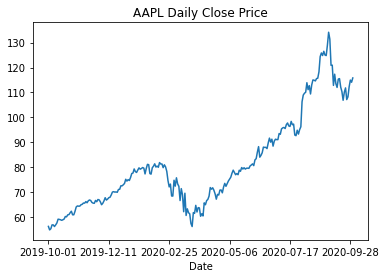

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
AAPL_price.set_index('Date',inplace=True,drop=True)
AAPL_price.plot(legend=False)
plt.title('AAPL Daily Close Price')

# 1. Rolling Mean and Variance

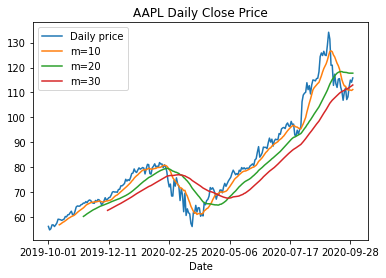

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
AAPL_price.set_index('Date',inplace=True,drop=True)

ax = AAPL_price.plot(legend=False)
ax.set_title('AAPL Daily Close Price')

AAPL_price.rolling(window=10).mean().plot(ax=ax)
AAPL_price.rolling(window=30).mean().plot(ax=ax)
AAPL_price.rolling(window=50).mean().plot(ax=ax)

ax.legend(['Daily price', 'm=10', 'm=20', 'm=30'])

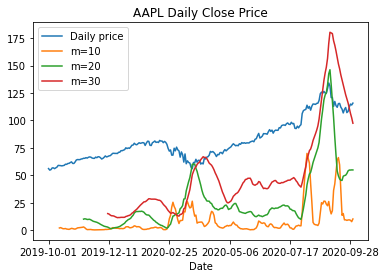

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Date', 'Close'])
AAPL_price.set_index('Date',inplace=True,drop=True)

ax = AAPL_price.plot(legend=False)
ax.set_title('AAPL Daily Close Price')

AAPL_price.rolling(window=10).var().plot(ax=ax)
AAPL_price.rolling(window=30).var().plot(ax=ax)
AAPL_price.rolling(window=50).var().plot(ax=ax)

ax.legend(['Daily price', 'm=10', 'm=20', 'm=30'])

# 2. Stationarity and Weak Dependence

Stationarity has three requirements. The mean and variance of the time series data both are constant. In addition, the covariance of two time points with a lag (h) is a function of the lag, while it should not be dependent on time point (t).

Weak dependence requires that the correlation of two time points becomes zero when the lag h becomes infinity.

![SW](https://miro.medium.com/max/1400/1*Pe_mnQW9CI__CKVpksGJTg.png)

# 3. Autoregressive Process and Moving Average Process

For autoregressive process, the time series data depends on itself with a time lag. When the time series data only depends on itself with a time lag of 1, the process is called AR(1). If the time series data depends on itself with a time lag of N, then the process is called AR(N).

![AR](https://miro.medium.com/max/1400/1*HdMpyGDxQUijupgjBs5v4Q.png)

(0.0, 10000.0)

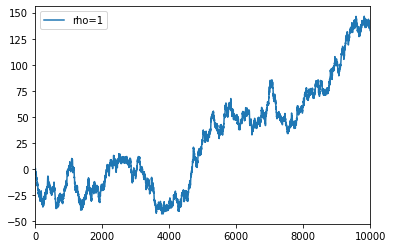

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
rho = 1

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0]
for i in range(1,N):
    x.append(rho*x[-1]+sigma[i])
plt.plot(x, label='rho=1')
plt.legend()
plt.xlim(0,N)

![MA](https://miro.medium.com/max/1400/1*r9pWtRa1Me5iBUAFeETHtw.png)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


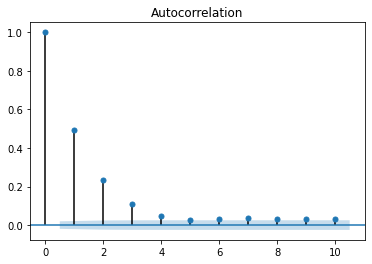

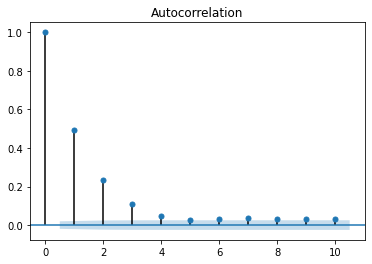

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

N = 10000
rho = 0.5

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0]
for i in range(1,N):
    x.append(rho*x[-1]+sigma[i])
    
plot_acf(np.array(x),lags=10)

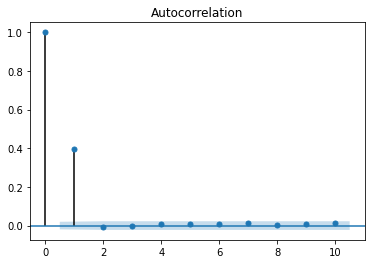

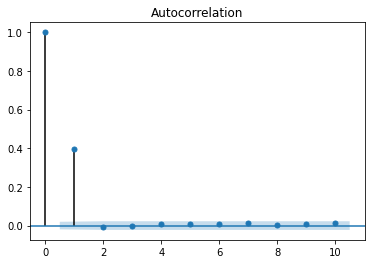

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

N = 10000
theta = 0.5

sigma = np.random.normal(loc=0, scale=1, size=N+1)
x = []

for i in range(1,N+1):
    x.append(sigma[i]+theta*sigma[i-1])

plot_acf(np.array(x),lags=10)

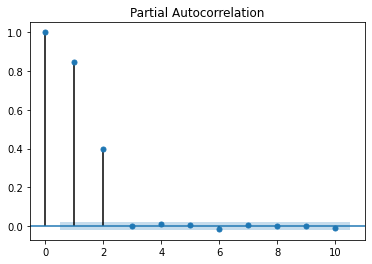

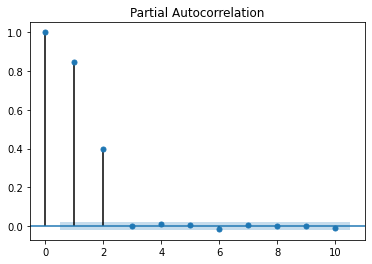

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

N = 10000
rho = 0.5
rho2 = 0.4

sigma = np.random.normal(loc=0, scale=1, size=N)
x = [0,0]

for i in range(2,N):
    x.append(rho*x[-1]+rho2*x[-2]+sigma[i])

plot_pacf(np.array(x),lags=10)

# Order of Integration Process

In [10]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

AAPL_price = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Time-Series-Analysis/master/Data/AAPL.csv',usecols=['Close'])
result = adfuller(AAPL_price.iloc[:,0].values)
print(f'p value is {result[1]}')

p value is 0.9113608715076301
